# Some Data Science for Digital Horticulture

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("./data/FargroSample.csv", encoding='utf-8')

In [3]:
# remove leading and trailing spaces from the DeviceID column
df['DeviceID'] = df['DeviceID'].apply(lambda val: val.strip().replace(' ', ''))

df['Timestamp'] = df['Timestamp'].apply(lambda val : datetime.fromisoformat(val))

df = df[['DeviceID', 'Timestamp', 'airtemp', 'airhumidity', 'irtemp', 'dewpoint']]

df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

df.sample(5)

,DeviceID,Timestamp,airtemp,airhumidity,irtemp,dewpoint
1516,1FEFF6F,2022-09-21 08:13:01,20.12,70.10,18.11,23.50
9508,1FEFF6F,2022-12-08 16:33:04,7.13,70.46,5.45,36.59
5280,1FEFF6F,2022-11-04 19:13:00,10.50,71.56,10.67,32.18
10808,1FEFF5D,2022-10-08 14:44:13,23.82,58.20,21.25,22.79
992,1FEFF6F,2022-09-15 12:43:00,22.20,50.46,20.81,25.48


In [4]:
df.DeviceID.unique()

array(['1FEFF6F', '1FEFF5D', '1FEFFEC'], dtype=object)

In [5]:
grouped = df.groupby(df.DeviceID)

data = grouped.get_group('1FEFF6F')
d2df = grouped.get_group('1FEFF5D')
d3df = grouped.get_group('1FEFFEC')

In [6]:
data = data[["Timestamp", "airtemp", "airhumidity", "irtemp", "dewpoint"]]

In [7]:
data.sample(5)

,Timestamp,airtemp,airhumidity,irtemp,dewpoint
5843,2022-11-09 20:42:57,11.17,71.41,10.37,32.82
2011,2022-09-27 09:33:00,20.81,63.27,18.81,24.83
7286,2022-11-21 22:22:58,8.15,70.71,7.57,35.66
9002,2022-12-05 04:53:01,6.81,74.41,6.83,35.60
1505,2022-09-21 03:53:01,8.73,73.80,10.13,34.71


In [8]:
# Missing values in whole data e.g., the data from Device 1 ['1FEFF6F'].
data.isna().sum().sum()

292

In [9]:
for i, col in enumerate(data.columns):
    if col == 'Timestamp':
        print('Timestamp encountered. Skipping')
        continue
    data[col].fillna(int(data[col].mean()), inplace=True)

Timestamp encountered. Skipping


In [10]:
# fill missing values with mean value. other options are available but for this example we choose mean.
data.isna().sum().sum()

0

In [11]:
# group by 15 minutes interval
data["Timestamp"] = data["Timestamp"].dt.floor('15min')
groupeddata = data.groupby(by="Timestamp").agg({col: np.mean for col in ["airtemp", "airhumidity", "irtemp", "dewpoint"]})


In [12]:
gdata = groupeddata.copy(deep = True)

In [13]:
gdata.isna().sum().sum()

0

In [14]:
gdata.describe()

,airtemp,airhumidity,irtemp,dewpoint
count,7287.000000,7287.000000,7287.000000,7287.000000
mean,14.137901,69.603643,13.984401,29.368397
std,8.095760,5.628698,9.073301,4.387501
min,-114.900000,45.420000,-115.820000,15.370000
25%,10.487500,67.070000,10.830000,26.170000
50%,14.480000,71.240000,14.690000,28.970000
75%,17.900000,73.720000,17.790000,32.802500
max,31.435000,78.870000,30.550000,44.940000


In [15]:
# checking for below zero temperature
gdata[gdata.airtemp < 0]

,airtemp,airhumidity,irtemp,dewpoint
Timestamp,,,,
2022-12-08 04:30:00,-113.315,72.635,-114.610,43.845
2022-12-08 04:45:00,-113.260,72.590,-114.610,43.780
2022-12-08 05:00:00,-113.170,72.495,-114.560,43.670
2022-12-08 05:15:00,-113.200,72.320,-114.490,43.490
2022-12-08 05:30:00,-114.025,72.530,-114.450,43.490
2022-12-08 05:45:00,-114.900,72.500,-114.110,43.400
2022-12-08 06:00:00,-114.835,72.525,-115.110,43.345
2022-12-08 06:15:00,-114.750,72.570,-114.270,43.270
2022-12-08 06:30:00,-114.720,72.640,-114.150,43.255


* As we can see the temperature goes well below zero degrees upto -115C. Not sure if these are expected in greenhouses but looks odd!


## Here are boxplots to visually see some outliers.


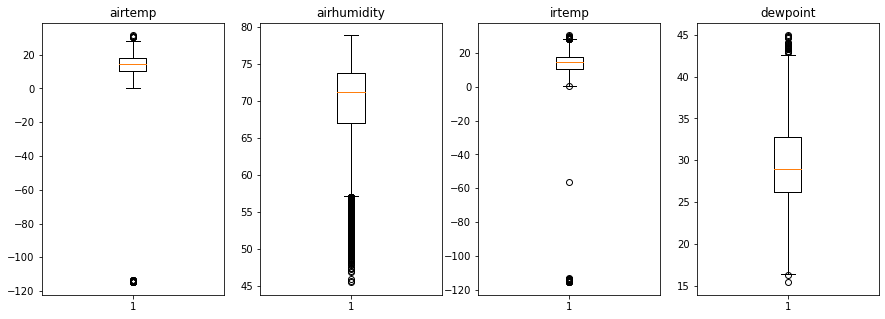

In [16]:

# boxplot the DataFrame
fig, axs = plt.subplots(1, len(gdata.columns), figsize=(15,5))
for i, col in enumerate(gdata.columns):
    axs[i].boxplot(gdata[col])
    axs[i].set_title(col)

# Show the plot
plt.show()


**Outliers**: There are outliers in the data as can be seen from the plots above. We can remove the outliers but sometime these outliers show an unexpected behaviour of the system.  Here domain knowledge is required to suggest either the removal or inclusion of these outliers from the data.


**Daily observations** Below are some plots to see the daily observations of environmental factors in the greenhouse

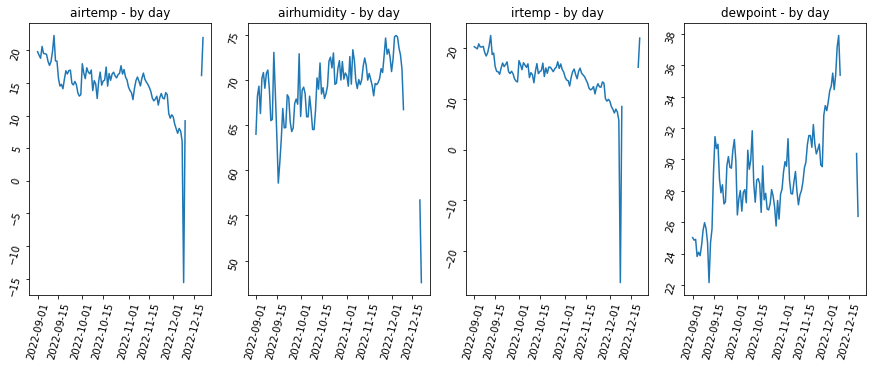

In [29]:
# boxplot the DataFrame
df_day = gdata.resample('D').mean()
fig, axs = plt.subplots(1, len(df_day.columns), figsize=(15,5))
for i, col in enumerate(df_day.columns):
    axs[i].plot(df_day[col], '-', label=col)
    axs[i].set_title(f'''{col} - by day''')
    axs[i].tick_params(labelrotation=75)
plt.show()


**Correlation**: The following plot shows pair-wise correlation between the environmental variables from the provided dataset.


Text(0.5, 1.0, 'Correlation Matrix')

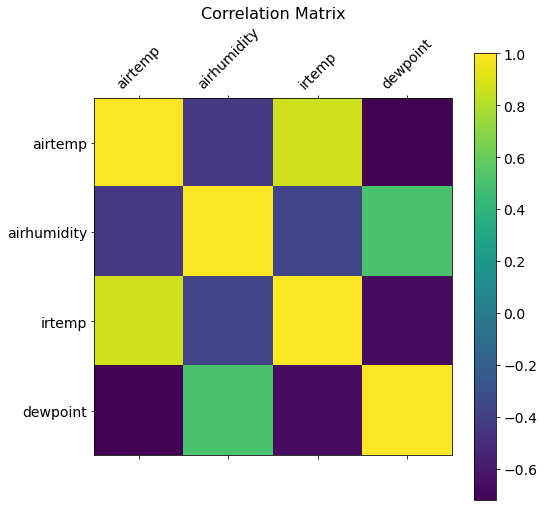

In [30]:
f = plt.figure(figsize=(8, 8))
plt.matshow(gdata.corr(), fignum=f.number)
plt.xticks(range(gdata.select_dtypes(['number']).shape[1]), gdata.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(gdata.select_dtypes(['number']).shape[1]), gdata.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)



In [31]:
gdata.isna().sum().sum()

0

In [32]:
# Split the data into input variables (X) and the target variable (y)
X = gdata[["airtemp", "airhumidity"]]
y = gdata["irtemp"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train.describe()

,airtemp,airhumidity
count,5829.000000,5829.000000
mean,14.201388,69.620505
std,7.659574,5.606639
min,-114.835000,45.900000
25%,10.500000,67.035000
50%,14.500000,71.240000
75%,17.890000,73.740000
max,31.435000,78.870000


In [34]:
y_train.describe()

count    5829.000000
mean       14.015222
std         8.950660
min      -115.820000
25%        10.830000
50%        14.710000
75%        17.810000
max        30.550000
Name: irtemp, dtype: float64

## Enough of visualisation, time to predict something...

Predict **Leaf Temperature** based on air-temperature and air-humidity

In [45]:

# Split the data into input variables (X) and the target variable (y)
X = gdata[["airtemp", "airhumidity"]]
y = gdata["irtemp"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a random forest regression model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error between the predicted and actual firmness values
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)



Mean Squared Error: 0.8301662985096554


**Note**: This is just a toy model that do predictions. obviously we can improve the prediction in many ways such as by adjusting its parameters or selecting different machine learning models such as deep learning. OR by including more environmental factors such as light-levels which is an important factor for plant growth in greenhouses. 

Additionally, the provided data do not full-fills the requirements to predict fruit firmness as required labels are missing. 

## Suggestions for FarGro Digital Horticulture

**Expert Systems**

**1.** Given the expert (domain) knowledge in the context, an expert system capable of providing prescriptive recommendations can be developed to automate and assist the experts in decision making process. <br> <br>

**2.** In addition, an alert system can be developed to monitor the air temperature, and humidity levels, and generates alerts with recommended actions if values of these factors deviates from the given ranges. 

**3.** With the expert knowledge, the whole system can be automated. which can help growers  make more informed decisions, leading to improved quality, increased yield reduce human efforts and time.


**Automated Climate Control** 
 
**4.** Automated climate controle systems can be developed to ensure the desired temperature, humidity, and light levels, which are necessary for optimal growth and fruit health in greenhouse.


**Computer Vision**

**5.** Computer vision: we can use drones to capture images of strawberries at various stages of growth and use deep learning models like Convolutional Neural Networks to detect and analyse physical characteristics like color and size which can be later on used to predict fruit health, and firmness.



### Final Remarks

Finally, machine learning models learn from data, therefore, data acquisition, data quality, management and organisation are vital for any data science project. So, initially, a scalable data storage platform needs to be developed to capture and store all sort of data in an organised way.

Additionally, more sensors can be added to acquire more types of data at every stage of growth, such as light-levels, images and other factors that can possibly impact the strawberry growth, yield and firmenss. This data can later on be used for prediction, and optimisation purposes.

The good thing is that the expert knowledge is there, so we can build Expert Systems (decision support systems) to control environmental conditions in an automated way by monitoring the data from various sensors. The expert knowledge can be transformed into computer interpretable rules with prescriptive recommendations. With the development of a reasoning engine, these rules can be fired against the abnormal conditions for instant human intervention or automated actions to be taken by intelligent algorithms.